Here is a nonlinearity for V1 output (see function f(x) in the second cell) that is probably about right for passing on only strong V1 oscillations to MT. 

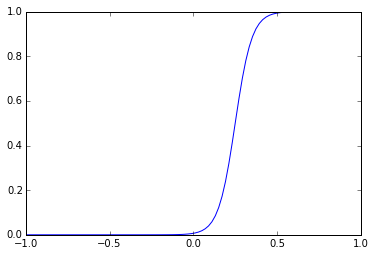

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

r = np.linspace(-1, 1, 100)
plt.plot(r, 1 / (1 + np.exp(-20*r+5)))
plt.show()

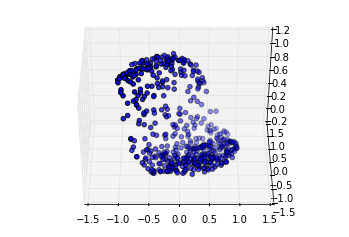

In [2]:
import nengo 
from mpl_toolkits.mplot3d import Axes3D

def f(x): 
    direction = np.sqrt(.5) * np.array([-1, 1])    
    r = np.dot(x, direction)
    return 1 / (1 + np.exp(-20*r+5))

model = nengo.Model('V1MT', seed=1)

v1 = nengo.Ensemble(nengo.LIF(200), dimensions=2)
mt = nengo.Ensemble(nengo.LIF(200), dimensions=1)
conn = nengo.Connection(v1, mt, transform=1, function=f)

sim = nengo.Simulator(model)
sim_ens = sim.model.objs[0]
sim_conn = sim.model.connections[0]

dec = sim_conn._decoders
points = sim_conn.eval_points
activities = sim_ens.activities(points)
decoded = np.dot(activities/1000, dec)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], decoded)
ax.view_init(40, -90)
plt.show()
